In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import newton


Text(0, 0.5, '$\\sigma_{mag}$')

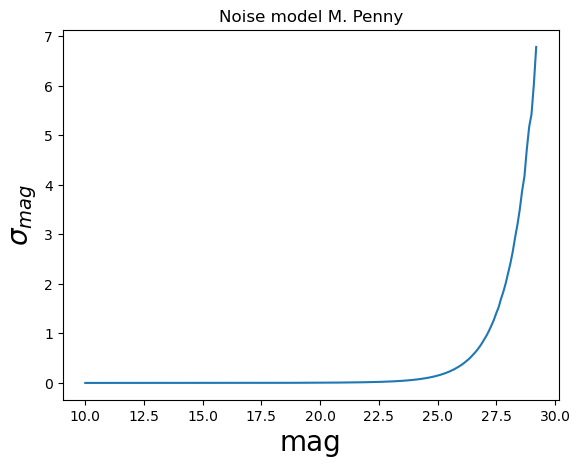

In [2]:

snr = pd.read_csv("snr_Roman.txt", sep=" ", names=["mag","err_mag"])
plt.plot(snr["mag"], snr["err_mag"])
plt.title('Noise model M. Penny')
plt.xlabel("mag",fontsize=20)
plt.ylabel("$\\sigma_{mag}$",fontsize=20)

Text(0, 0.5, '$\\mu_0 = 2.5 * LOG (5 \\sigma_{mag})$')

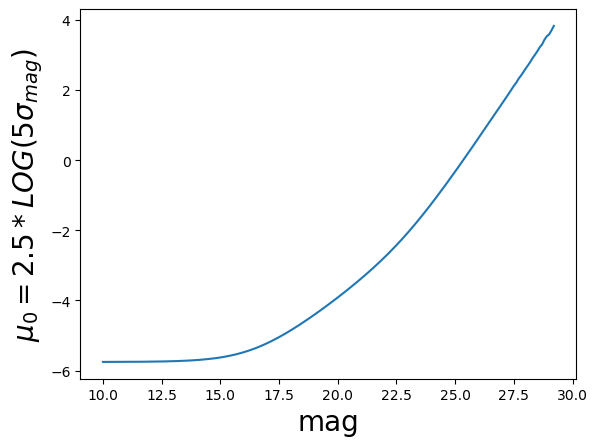

In [3]:
mu0 = 2.5*np.log10(5*snr['err_mag'])
plt.plot(snr['mag'],mu0)
plt.xlabel('mag', fontsize=20)
plt.ylabel('$\\mu_0 = 2.5 * LOG (5 \\sigma_{mag})$', fontsize=20)

In [5]:
# Define PSPL function
def mu(u0):
    return (u0**2 + 2) / (u0 * np.sqrt(u0**2 + 4))

# Define the function to find roots of: f(u0) = mu(u0) - target_mu
def f(u0, target_mu):
    return mu(u0) - target_mu

initial_guesses = [0.5, 2.0, 5.0]  # Try different initial guesses
# Parameters
mu_plot = []
u0_plot = []
mag_plot = []
i=0
for target_mu in mu0:
    # Use the SciPy newton function to find u0 values for each initial guess
    u0_solutions = []
    for guess in initial_guesses:
        try:
            # Find root using Newton's method with SciPy
            u0_solution = newton(f, guess, args=(target_mu,), tol=1e-8, maxiter=100)
            # Ensure unique solutions
            if not any(np.isclose(u0_solution, sol, atol=1e-6) for sol in u0_solutions):
                u0_solutions.append(u0_solution)
        except RuntimeError:
            print(f"Newton's method did not converge for initial guess {guess}")

    # print("u0 values for mu =", target_mu, ":", u0_solutions)
    for u in u0_solutions:
        mu_plot.append(target_mu)
        u0_plot.append(u)
        mag_plot.append(snr['mag'][i])
    i+=1

Newton's method did not converge for initial guess 0.5
Newton's method did not converge for initial guess 2.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 0.5
Newton's method did not converge for initial guess 2.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 0.5
Newton's method did not converge for initial guess 2.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 0.5
Newton's method did not converge for initial guess 2.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 0.5
Newton's method did not converge for initial guess 2.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 0.5
Newton's method did not converge for initial guess 2.0
Newton's method did not converge for initial guess 5.0
Newton's m

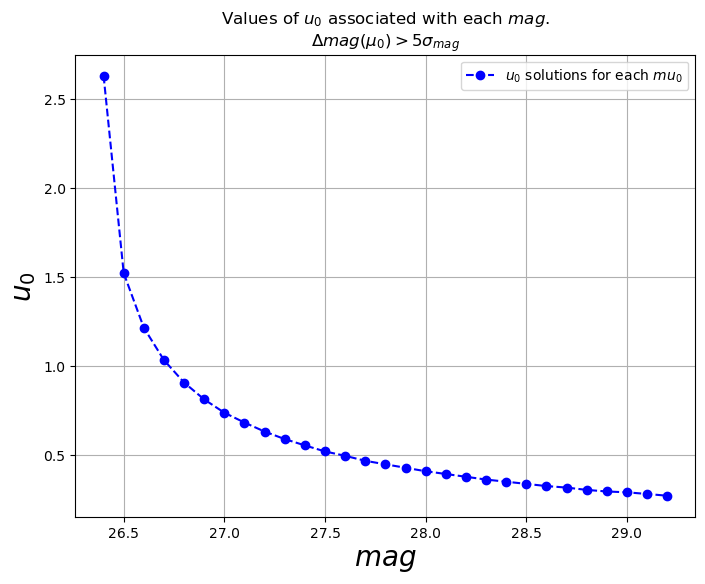

In [6]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(mag_plot, u0_plot, color='blue',marker='o',ls='--', label=r'$u_0$ solutions for each $mu_0$')
plt.xlabel(r'$mag$',fontsize=20)
plt.ylabel(r'$u_0$',fontsize=20)
plt.title(r'Values of $u_0$ associated with each $mag$.'+'\n$\Delta mag (\\mu_0)>5\\sigma_{mag}$')
plt.legend()
plt.grid(True)
plt.show()